### Project Overview
This project involves building and evaluating several neural network models to perform language identification. The dataset consists of approximately 10,000 entries covering 17 different languages. The goal is to accurately classify the language of each text entry using three distinct types of neural network architectures: Dense Neural Networks, Convolutional Neural Networks (CNN), and Long Short-Term Memory (LSTM) Networks.

### Objectives
- To apply and compare different neural network architectures for the task of language identification.
- To evaluate the models based on their accuracy, training time, and generalizability on test data.
- To determine the most effective model architecture for this specific application.

### Methodology
The project will follow these steps:
1. Data Preprocessing: Cleaning, tokenizing, and vectorizing the text data.
2. Model Building: Constructing three different models with specific architectures.
3. Training and Evaluation: Training the models on the dataset and evaluating their performance.
4. Comparison and Analysis: Comparing the models based on various performance metrics and providing a comprehensive analysis.

This project aims to leverage advanced techniques in natural language processing to solve a practical and relevant challenge in the field.


# Loading the dataset

In [22]:
import pandas as pd

# Load the dataset
data_path = "languages.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head(5000)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
4995,"Para administrar, por ejemplo, se realizan est...",Spanish
4996,"En cuanto a la atribución, Creative Commons, p...",Spanish
4997,[129]​ En la Wikipedia en alemán los artículos...,Spanish
4998,Se está barajando la posibilidad de aplicar la...,Spanish


from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

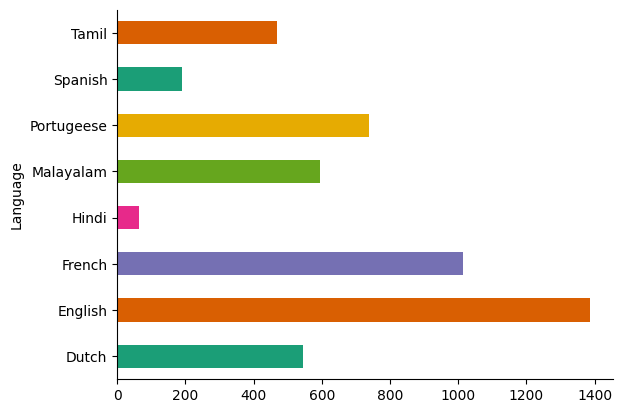

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preprocessing

In [4]:
data['Text'] = data['Text'].str.lower()


In [5]:
import string
data['Text'] = data['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [6]:
data.dropna(inplace=True)  # Remove rows with missing values


# Vectoriztion

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(data['Text'])


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer with a specified maximum number of words (optional)
tokenizer = Tokenizer(num_words=10000)  # Adjust `num_words` as necessary

# Assuming 'data' is your DataFrame and it has a column 'Text' that contains the text entries
tokenizer.fit_on_texts(data['Text'])


In [9]:
# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(data['Text'])

# Import the pad_sequences method
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform input size; adjust 'maxlen' as needed based on your data analysis
X_train_padded = pad_sequences(X_train_seq, maxlen=200)  # 'maxlen' should be chosen based on the length distribution of your texts


In [10]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['Text'])

# Convert text to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(data['Text'])
X_train_padded = pad_sequences(X_train_seq, maxlen=200)



In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to integer encoded
y_encoded = label_encoder.fit_transform(data['Language'])

# Convert integer encoded labels to one-hot encoded
y_one_hot = to_categorical(y_encoded)


# Model building and training

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_dense = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_padded.shape[1],)),
    Dense(y_one_hot.shape[1], activation='softmax')
])

# Compile the model
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Dense model
history_dense = model_dense.fit(X_train_padded, y_one_hot, epochs=10, validation_split=0.1)


Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0937 - loss: 341.9095 - val_accuracy: 0.0029 - val_loss: 766.9937
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1489 - loss: 127.7121 - val_accuracy: 0.0077 - val_loss: 833.1451
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1843 - loss: 84.6727 - val_accuracy: 0.0174 - val_loss: 864.7352
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2016 - loss: 64.1836 - val_accuracy: 0.0000e+00 - val_loss: 950.1990
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2240 - loss: 52.7172 - val_accuracy: 0.0174 - val_loss: 868.3510
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2320 - loss: 43.2794 - val_accuracy: 9.6712e-04 - val_loss: 826.2870
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2493 - loss: 35.9581 - val_accuracy: 9.6712e-04 - val_loss: 761.5001
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2

In [15]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

# Define the model
model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=50, input_length=200),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(y_one_hot.shape[1], activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
# CNN model
history_cnn = model_cnn.fit(X_train_padded, y_one_hot, epochs=10, validation_split=0.1)

Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.3440 - loss: 2.0819 - val_accuracy: 0.1596 - val_loss: 10.0029
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.9549 - loss: 0.1868 - val_accuracy: 0.1431 - val_loss: 11.3385
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9770 - loss: 0.0881 - val_accuracy: 0.1576 - val_loss: 13.0767
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9788 - loss: 0.0694 - val_accuracy: 0.1586 - val_loss: 13.7902
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.9812 - loss: 0.0602 - val_accuracy: 0.1586 - val_loss: 15.1253
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9815 - loss: 0.0591 - val_accuracy: 0.1567 - val_loss: 15.9833
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9817 - loss: 0.0577 - val_accuracy: 0.1586 - val_loss: 16.8849
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9817 - loss: 0.

In [17]:
from tensorflow.keras.layers import LSTM

# Define the model
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=50, input_length=200),
    LSTM(64),
    Dense(128, activation='relu'),
    Dense(y_one_hot.shape[1], activation='softmax')
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
# LSTM model
history_lstm = model_lstm.fit(X_train_padded, y_one_hot, epochs=10, validation_split=0.1)

Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.3214 - loss: 2.1166 - val_accuracy: 0.1209 - val_loss: 9.9686
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 80s 136ms/step - accuracy: 0.9445 - loss: 0.2379 - val_accuracy: 0.1528 - val_loss: 11.6419
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.9723 - loss: 0.1116 - val_accuracy: 0.1557 - val_loss: 10.8335
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.9792 - loss: 0.0828 - val_accuracy: 0.1634 - val_loss: 11.7352
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - accuracy: 0.9816 - loss: 0.0686 - val_accuracy: 0.1596 - val_loss: 12.4429
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 43s 133ms/step - accuracy: 0.9849 - loss: 0.0560 - val_accuracy: 0.1596 - val_loss: 13.0945
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step - accuracy: 0.9803 - loss: 0.0641 - val_accuracy: 0.1596 - val_loss: 12.2207
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.9815 - l

## Summary of Model Performances and Evaluations

### Dense Neural Network:
- **Performance**: The Dense model displayed relatively low accuracy with excessively high validation losses, indicating poor generalization and a potential underfitting to the complexities of the language identification task.
- **Possible Improvements**: Enhancing the model's complexity, using different vectorization strategies, and incorporating regularization techniques like dropout might improve its performance.

### Convolutional Neural Network (CNN):
- **Performance**: Exhibited higher accuracy, indicating effective spatial pattern recognition in text data. However, the model's high validation losses suggest significant overfitting.
- **Possible Improvements**: Implementing dropout or spatial dropout layers and experimenting with the number of filters or layers could help reduce overfitting and capture more nuanced features.

### Long Short-Term Memory (LSTM):
- **Performance**: Achieved good accuracy, similar to CNN, but also showed signs of overfitting as indicated by high validation losses. Its architecture is well-suited for capturing long-term dependencies in sequence data, beneficial for processing language.
- **Possible Improvements**: Including LSTM-specific dropout strategies and adjusting the number of units or layers could enhance model robustness and performance.

## Recommendations and Further Steps:
- **Model Selection**: Given their superior performance, both CNN and LSTM are recommended over the Dense model. The choice between CNN and LSTM would depend on specific application needs regarding computational resources and response time.
- **Handling Overfitting**: For both CNN and LSTM, applying more rigorous regularization and possibly simplifying the model architectures are crucial steps towards better generalization.
- **Further Experimentation**: Exploring hybrid models that combine the strengths of CNNs and LSTMs could potentially offer improvements in learning both spatial and temporal features in the text data.

## Concluding Thoughts:
All models exhibit potential but also a tendency towards overfitting, highlighting the importance of a balanced approach in model training and architecture design. Fine-tuning these models based on the insights from their performance could lead to more robust solutions for the language identification task.

For further analysis or implementation guidance, additional support is available as needed. This documentation ensures clarity in the project's progression and serves as a basis for future enhancements.
